In [71]:
!pip install gymnasium numpy pygame pennylane matplotlib

   ---------------------------------------- 0.0/5.3 MB ? eta -:--:--
   ------- -------------------------------- 1.0/5.3 MB 8.4 MB/s eta 0:00:01
   ------------- -------------------------- 1.8/5.3 MB 9.1 MB/s eta 0:00:01
   ----------------------- ---------------- 3.1/5.3 MB 6.1 MB/s eta 0:00:01
   ----------------------- ---------------- 3.1/5.3 MB 6.1 MB/s eta 0:00:01
   --------------------------------- ------ 4.5/5.3 MB 4.9 MB/s eta 0:00:01
   ---------------------------------------  5.2/5.3 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 5.3/5.3 MB 4.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/934.3 kB ? eta -:--:--
   ---------------------------------------- 934.3/934.3 kB 8.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/5.4 MB ? eta -:--:--
   --------------- ------------------------ 2.1/5.4 MB 11.8 MB/s eta 0:00:01
   ------------------------- -------------- 3.4/5.4 MB 8.0 MB/s eta 0:00:01
   -----------------------

In [63]:
import gymnasium as gym
import numpy as np
from collections import deque
import matplotlib.pyplot as plt


## Clasico

In [64]:
matrix = ["SFHF", "HFFH", "HHFF", "GFFF"]
env = gym.make('FrozenLake-v1',render_mode="rgb_array", desc=matrix, map_name="4x4", is_slippery=False)
state = env.reset()

num_states = env.observation_space.n
num_actions = env.action_space.n
print("numero de estados: ",num_states)
print("numero de acciones: ",num_actions)


numero de estados:  16
numero de acciones:  4


<img 
  src="https://raw.githubusercontent.com/cdavid2804/test-1/main/Q_learning_Algorithm.png"
  alt="QL_Algorithm"
  width="700"
  style="filter: invert(100%);"
/>


In [65]:
Q = np.zeros((num_states, num_actions))

alpha = 0.7
gamma = 0.995
epsilon = 1.0
epsilon_decay = 0.01
epsilon_min = 0.001
num_episodes = 1000

episode_rewards = deque(maxlen=num_episodes)

In [66]:
GOAL = 12
HOLES = [2, 4, 7, 8, 9]

In [67]:
def epsilon_greedy(state, epsilon):
    if np.random.rand() < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(Q[state])


In [68]:
def reward_function(next_state):
    if next_state == GOAL:
        return 20
    elif next_state in HOLES:
        return -50
    else:
        return -1

In [69]:
for episode in range(1, num_episodes + 1):
    state, info = env.reset()
    done = False
    total_reward = 0
    steps = 0

    while not done:
        action = epsilon_greedy(state, epsilon)

        next_state, _, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        reward = reward_function(next_state)

        # No bootstrap en estado terminal
        if done:
            td_target = reward
        else:
            td_target = reward + gamma * np.max(Q[next_state])

        Q[state, action] += alpha * (td_target - Q[state, action])

        total_reward += reward
        state = next_state
        steps += 1

    episode_rewards.append(total_reward)

    # Decaimiento de epsilon
    epsilon = max(epsilon_min, epsilon * (1 - epsilon_decay))

    if episode % 100 == 0:
        avg_reward = np.mean(episode_rewards)
        print(
            f"Episode {episode:4d} | "
            f"Avg Reward (last 100): {avg_reward:6.2f} | "
            f"Epsilon: {epsilon:.4f} | "
            f"Steps: {steps}"
        )

env.close()

Episode  100 | Avg Reward (last 100): -48.13 | Epsilon: 0.3660 | Steps: 2
Episode  200 | Avg Reward (last 100): -32.95 | Epsilon: 0.1340 | Steps: 4
Episode  300 | Avg Reward (last 100): -20.59 | Epsilon: 0.0490 | Steps: 7
Episode  400 | Avg Reward (last 100): -13.32 | Epsilon: 0.0180 | Steps: 7
Episode  500 | Avg Reward (last 100):  -7.99 | Epsilon: 0.0066 | Steps: 7
Episode  600 | Avg Reward (last 100):  -4.44 | Epsilon: 0.0024 | Steps: 7
Episode  700 | Avg Reward (last 100):  -1.80 | Epsilon: 0.0010 | Steps: 7
Episode  800 | Avg Reward (last 100):   0.09 | Epsilon: 0.0010 | Steps: 7
Episode  900 | Avg Reward (last 100):   1.63 | Epsilon: 0.0010 | Steps: 7
Episode 1000 | Avg Reward (last 100):   2.87 | Epsilon: 0.0010 | Steps: 7


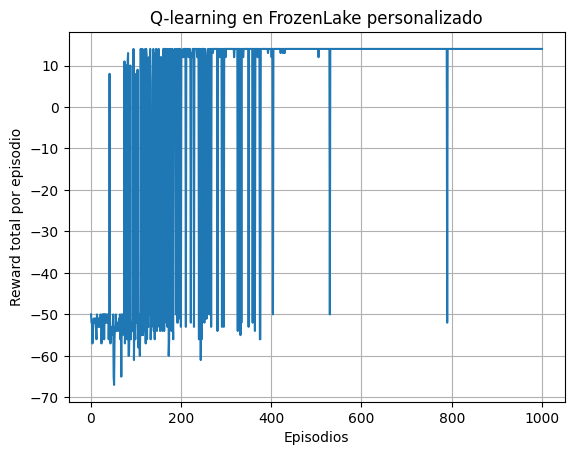

In [70]:
episodes = np.arange(1, len(episode_rewards) + 1)

plt.figure()
plt.plot(episodes, episode_rewards)
plt.xlabel("Episodios")
plt.ylabel("Reward total por episodio")
plt.title("Q-learning en FrozenLake personalizado")
plt.grid(True)
plt.show()

## Cuantico